**distfit** is a python package for *probability density fitting* of univariate distributions on non-censored data. With the Residual Sum of Squares (RSS) we determine the best fit across 89 theoretical distributions for which the best fitted theoretical distribution is returned with the loc, scale, arg parameters. The probability of new data-points can then be assed for significance.

* [API Documentation](https://erdogant.github.io/distfit/)
* [Github]( https://github.com/erdogant/distfit)


In [1]:
!pip install -U distfit
import distfit
print(distfit.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.5.2


In [2]:
import pandas as pd
import numpy as np
from distfit import distfit

## Make example dataset

In [3]:
X = np.random.normal(0, 2, 5000)
y = [-8,-6,0,1,2,3,4,5,6]

In [4]:
# Initialize model with default parameters
dist = distfit(todf=True)

# Fit on data
model = dist.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00159199] [loc=0.002 scale=1.969]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.349085] [loc=-7.360 scale=7.362]
[distfit] >INFO> [pareto    ] [0.57 sec] [RSS: 0.318835] [loc=-908193728.971 scale=908193721.611]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.00557291] [loc=0.001 scale=1.686]
[distfit] >INFO> [t         ] [0.12 sec] [RSS: 0.001592] [loc=0.002 scale=1.969]
[distfit] >INFO> [genextreme] [0.41 sec] [RSS: 0.00292607] [loc=-0.728 scale=1.968]
[distfit] >INFO> [gamma     ] [0.16 sec] [RSS: 0.00162211] [loc=-166.307 scale=0.023]
[distfit] >INFO> [lognorm   ] [0.32 sec] [RSS: 0.00163478] [loc=-183.015 scale=183.007]
[distfit] >INFO> [beta      ] [0.14 sec] [RSS: 0.00158943] [loc=-32.433 scale=59.288]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.241901] [loc=-7.360 scale=14.327]
[distfit] >INFO> [loggamma  ] [0.13 sec] [RSS: 0.00160104] [loc=-342.636 scale=52.265]
[distfit] >

## Plotting

[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a3cb2d370>)

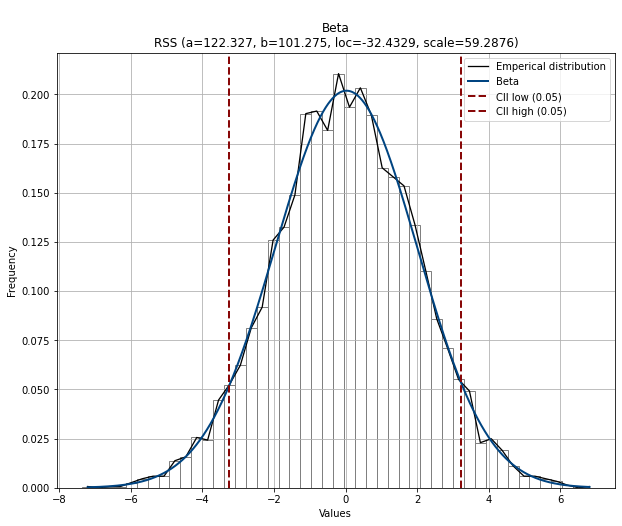

In [5]:
# Make plot
dist.plot(figsize=(10,8))


[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]
[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]
[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]
[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]
[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a39b60af0>)

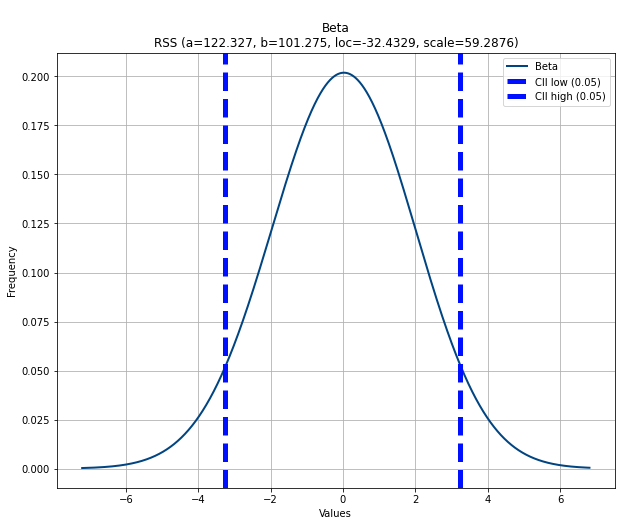

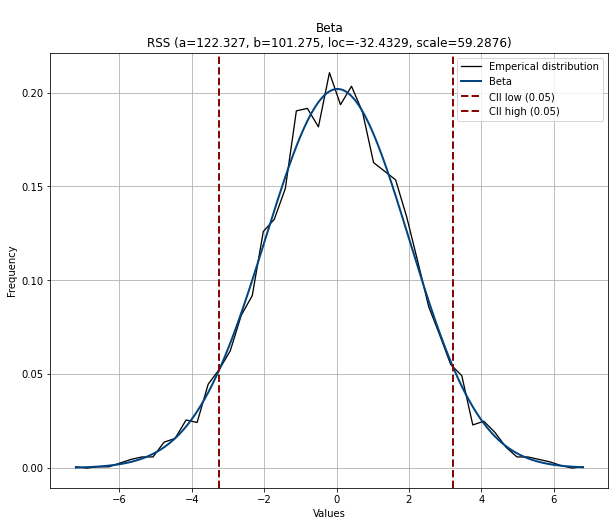

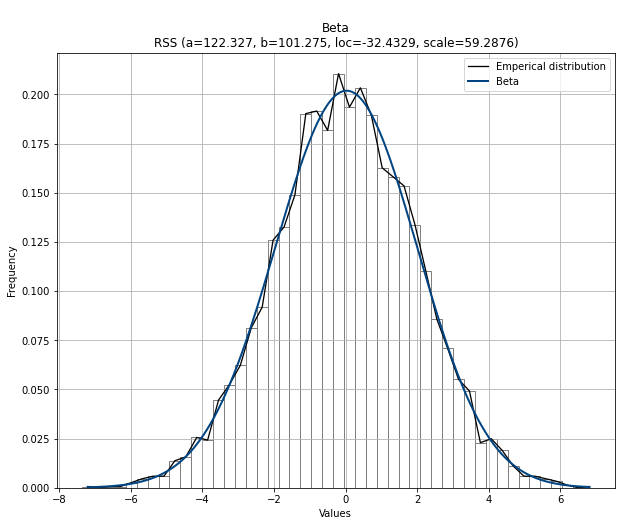

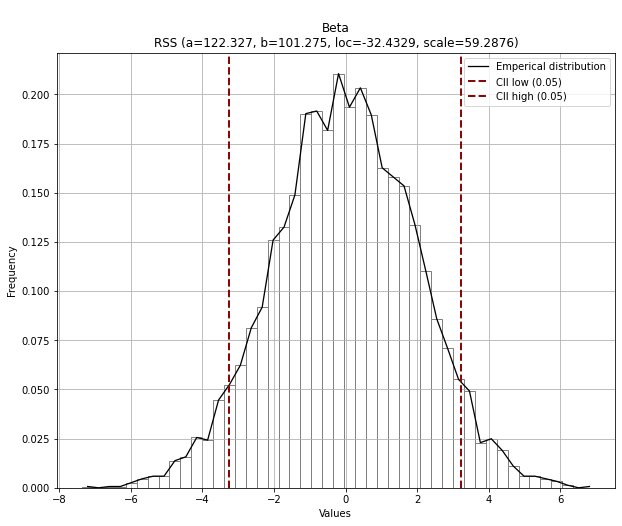

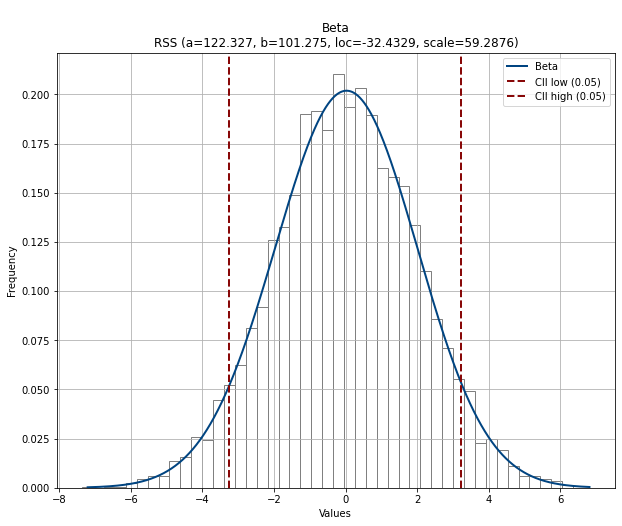

In [6]:
dist.plot(bar_properties=None, emp_properties=None, cii_properties={'color': '#000fff', 'linewidth': 5},  figsize=(10,8))

dist.plot(bar_properties=None, figsize=(10,8))
dist.plot(cii_properties=None, figsize=(10,8))
dist.plot(pdf_properties=None, figsize=(10,8))
dist.plot(emp_properties=None, figsize=(10,8))


## Predictions on new data

In [7]:
# Make prediction on new data
results = dist.predict(y)

[distfit] >INFO> Compute significance for 9 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


[distfit] >INFO> Create plot for the parametric method.
[distfit] >INFO> Mark 5 significant regions
[distfit] >INFO> Estimated distribution: beta [loc:-32.432928, scale:59.287596]
[distfit] >INFO> Ploting Summary.


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a3989e4c0>)

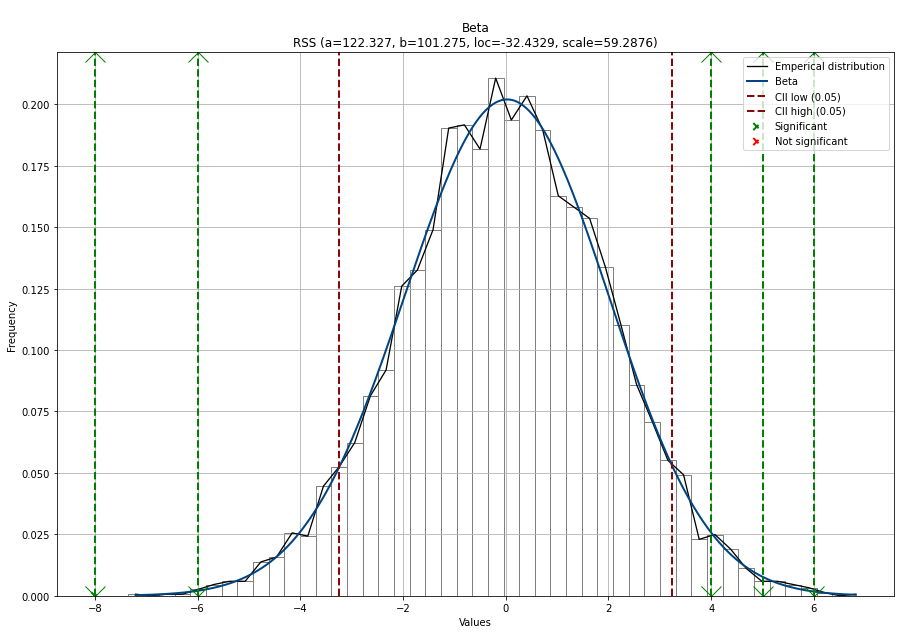

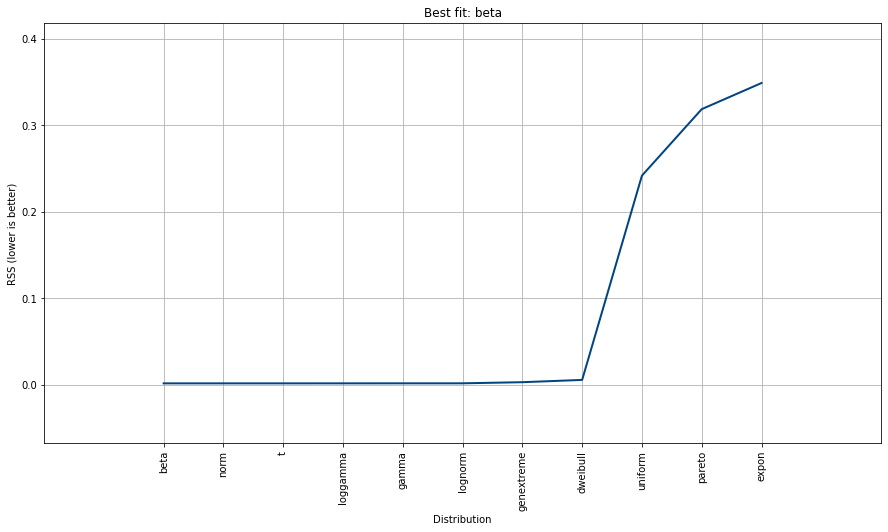

In [8]:
# plot predictions
dist.plot(figsize=(15, 10))
dist.plot_summary()

In [9]:
results['df']

,y,y_proba,y_pred,P
0,-8.0,0.000221,down,0.000025
1,-6.0,0.003616,down,0.001205
2,0.0,0.497952,none,0.497952
3,1.0,0.346229,none,0.307759
4,2.0,0.200080,none,0.155618
5,3.0,0.095055,none,0.063370
6,4.0,0.036629,up,0.020350
7,5.0,0.011369,up,0.005053
8,6.0,0.003616,up,0.000951


In [10]:
dist.results.keys()

dict_keys(['y', 'y_proba', 'y_pred', 'P', 'y_bool', 'df'])

In [11]:
print(dist.results['y_proba'])
print(dist.results['y_pred'])


[2.21314613e-04 3.61587795e-03 4.97952274e-01 3.46229342e-01
 2.00079966e-01 9.50545672e-02 3.66291201e-02 1.13685058e-02
 3.61587795e-03]
['down' 'down' 'none' 'none' 'none' 'none' 'up' 'up' 'up']


**Fit data using Discrete distribution; the binomial**

In [12]:
from scipy.stats import binom
# Generate random numbers

# Set parameters for the test-case
n = 8
p = 0.5

# Generate 10000 samples of the distribution of (n, p)
X = binom(n, p).rvs(10000)
print(X)

[4 2 4 ... 3 7 5]


In [13]:
# Initialize distfit for discrete distribution for which the binomial distribution is used. 
dist = distfit(method='discrete')

# Run distfit to and determine whether we can find the parameters from the data.
dist.fit_transform(X)

# Get the model and best fitted parameters.
print(dist.model)

# Best fitted n=8 and p=0.4999 which is great because the input was n=8 and p=0.5
print(dist.model['n'])
print(dist.model['p'])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000175] [n=8] [p=0.499312] [chi^2=2.5e-05]
[distfit] >INFO> Compute confidence interval [discrete]


{'name': 'binom', 'distr': <scipy.stats._discrete_distns.binom_gen object at 0x7f5a3cfe63a0>, 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5a39939fa0>, 'params': (8, 0.49931168288864874), 'score': 0.0001751875588599055, 'chi2r': 2.5026794122843643e-05, 'n': 8, 'p': 0.49931168288864874, 'CII_min_alpha': 2.0, 'CII_max_alpha': 6.0}
8
0.49931168288864874


[distfit] >INFO> Create plot for the discrete method.


(<Figure size 1080x720 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a37fa0790>,
       dtype=object))

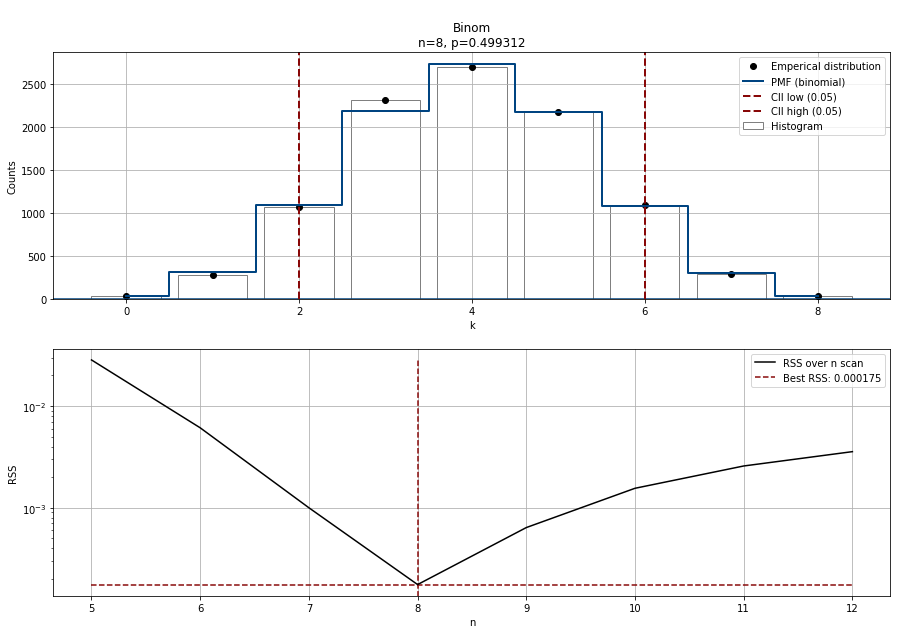

In [14]:
# Make plot
dist.plot(figsize=(15, 10))

In [15]:
# With the fitted model we can start making predictions on new unseen data
y = [0, 1, 10, 11, 12]
results = dist.predict(y)

[distfit] >INFO> Compute significance for 5 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


[distfit] >INFO> Create plot for the discrete method.


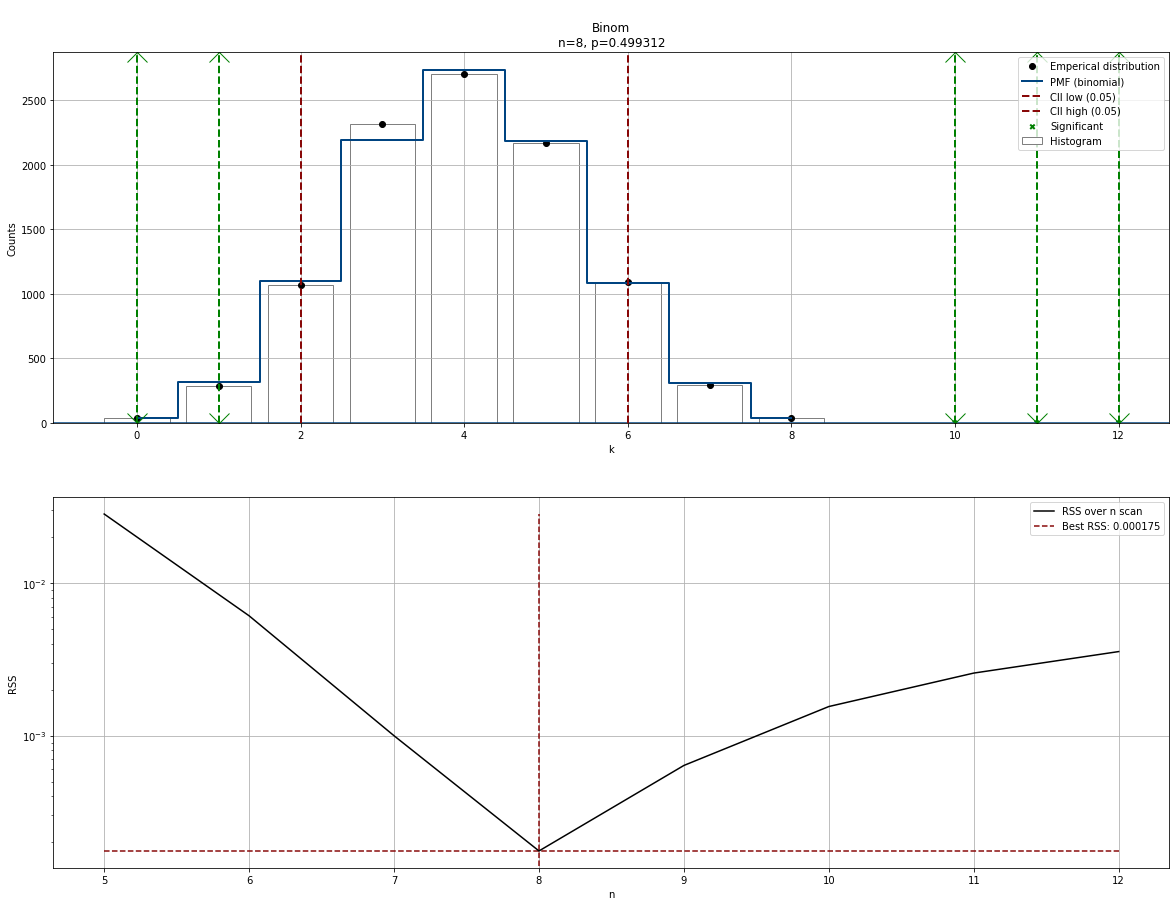

In [16]:
# Make plot with the results
dist.plot()

df_results = pd.DataFrame(pd.DataFrame(results))